<a href="https://colab.research.google.com/github/smshozab/Numerical-Craftery-/blob/main/Lab_Session_2_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practice to make a polynmial in numpy.**

```
import numpy as np
x=[1,2,3]
np.poly1d(x)
```



In [ ]:
import numpy as np
x=[1,2,3] # here 1,2,3 are coefficients of the polynomial in descending order
Poly1=np.poly1d(x)
print(Poly1)

Poly2=np.poly1d(x,True) #another format to print polynomial
print(Poly2)

   2
1 x + 2 x + 3
   3     2
1 x - 6 x + 11 x - 6



**Code to read data from a CSV file**
```
import pandas as pd
import numpy as np

# Read data from CSV file
df = pd.read_csv('data.csv')

# Convert data to numpy arrays
x = df['x values'].values
y = df['y values'].values

```



**Function for getting Lagrange Polynmial**


In [ ]:
x = [0, 20,40,60, 80, 100]
y = [26.0, -48.6, 61.6, -71.2, 74.8, -75.2]


# Function to calculate Lagrange polynomial
def lagrange_poly(x, y):
    n = len(x)
    p = np.poly1d(0.0)
# Initialize the Lagrange basis polynomial for the current data point
    for i in range(n):
        L = np.poly1d(y[i])
# Iterate through all data points to construct the Lagrange basis polynomial
        for j in range(n):
            if j != i:
# Construct the ith Lagrange basis polynomial term
                L *= np.poly1d([1.0, -x[j]]) / (x[i] - x[j])
        p += L
    return p

# Calculate Lagrange polynomial
p = lagrange_poly(x, y)
print(p)

            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26


**For Interpolating at a specific point**

In [ ]:
# Interpolate at a specific point
point = float(input("Enter x-coordinate to interpolate: "))
interp_value = p(point)

# Print Lagrange polynomial and interpolated value
print("Lagrange polynomial is:")
print(p)
print("Interpolated value at x =", point, "is:", interp_value)


Enter x-coordinate to interpolate: 50
Lagrange polynomial is:
            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26
Interpolated value at x = 50.0 is: -8.76015624999853


**TASK # 01**
---
Solve the above problem manually (Hand written & verify the polynomial & Interpolated value at x = 50
Show all the necessary steps and submitted in the form of PDF along with the project/.ipynb file at GCR

**Plotting of Lagrange Polynomial**

            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26


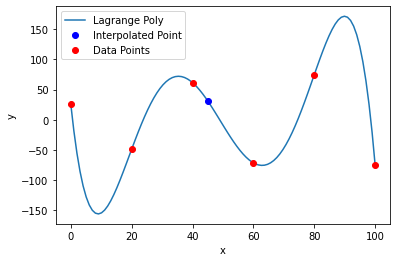

In [ ]:
import matplotlib.pyplot as plt
xi=45
yi=31.29079589843832
p = lagrange_poly(x[0:6], y[0:6])
print(p)
xp=np.linspace(0,x[5],100)
yp=p(xp)

plt.plot(xp, yp, label='Lagrange Poly')
plt.plot(xi, yi, 'bo', label='Interpolated Point')
plt.plot(x[0:6], y[0:6], 'ro', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

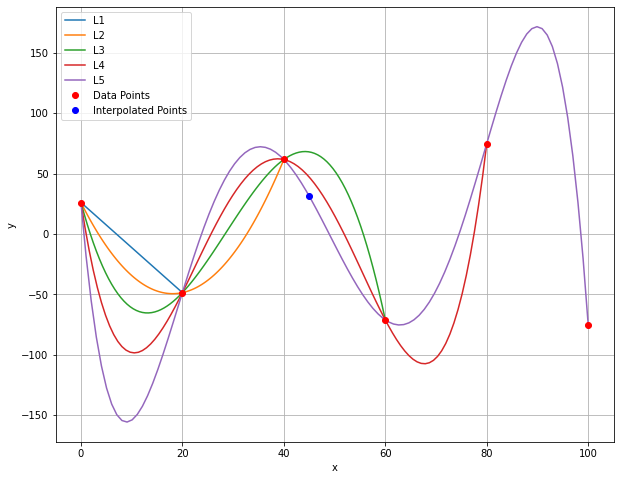

In [ ]:
fig = plt.figure(figsize = (10,8))
x = [0, 20,40,60, 80, 100]
y = [26.0, -48.6, 61.6,-71.2, 74.8, -75.2]
n=5
for i in range(1,n+1,1):
  p = lagrange_poly(x[0:i+1], y[0:i+1])
  xp=np.linspace(0,x[i],100)
  yp=p(xp)
  plt.plot(xp, yp, label = f"L{i}")
plt.plot(x,y,'ro',label="Data Points")
plt.plot(xi,yi,'bo',label="Interpolated Points")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# **Scipy Implimentation of Lagrange Polynomial**

*Instead we calculate everything from scratch, in scipy, we can use the lagrange function directly to interpolate the data. Let’s see the above example*

P(50) = -8.76015624999853


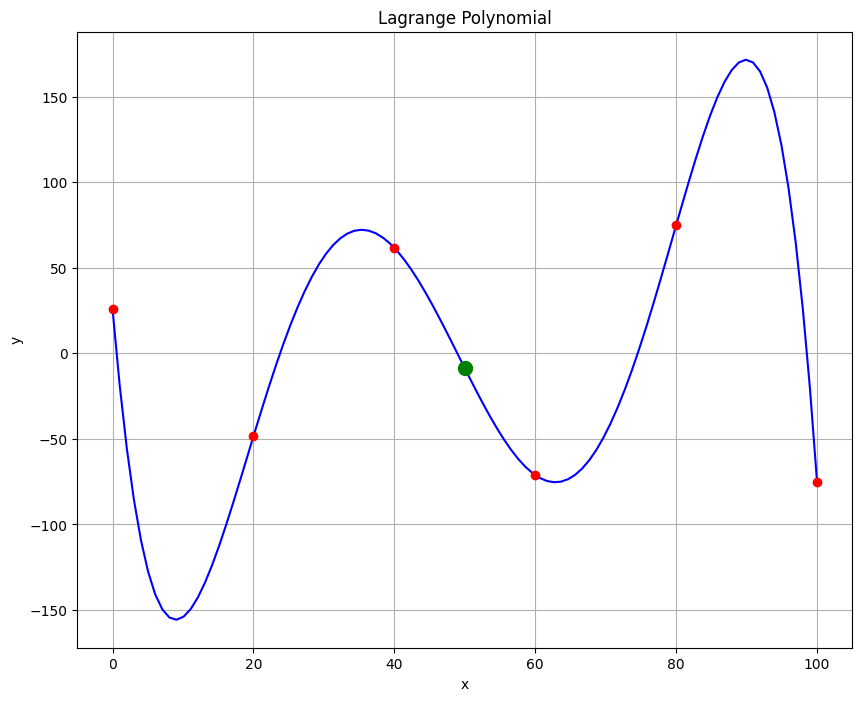

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define the data points
x = np.array([0, 20, 40, 60, 80, 100])
y = np.array([26.0, -48.6, 61.6, -71.2, 74.8, -75.2])

# Define the Lagrange Polynomial
f = lagrange(x, y)

# Find P(50) by evaluating the polynomial at x=50
p_50 = f(50)
print("P(50) =", p_50)

# Plot the Lagrange Polynomial and the data points
x_new = np.linspace(0, 100, 100)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.plot(50, p_50, 'go', markersize=10)
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# **Task # 02**
---
*Use the below code and apply the following alteration and show them along with plot*

**(i)**
Take input from user and show interpolation at that point along with its plot.

**(ii)** Also add a code that will display the polynomial too.

**Code for Newton divided difference Method**

Enter x-coordinate to interpolate: 50


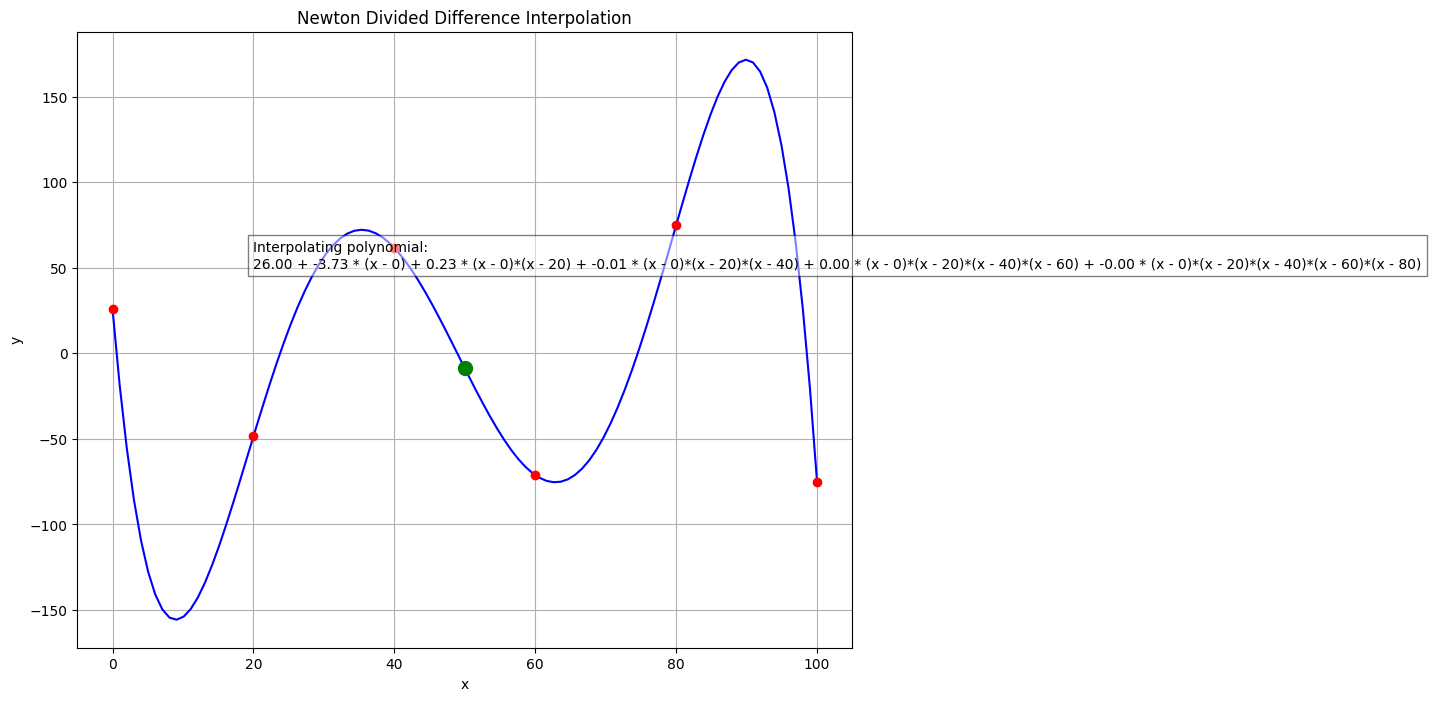

In [27]:
import numpy as np
import matplotlib.pyplot as plt

point = float(input("Enter x-coordinate to interpolate: "))

def divided_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    return F

def newton_div_dif_poly(x, y, xi):
    F = divided_difference_table(x, y)
    n = len(x)
    N = np.poly1d(F[0][0])
    poly_str = f"{F[0][0]:.2f}"
    for i in range(1, n):
        prod = np.poly1d(x[:i], True)
        N += np.poly1d(F[i][i]*(prod.c))
        poly_str += f" + {F[i][i]:.2f} * {'*'.join(['(x - {})'.format(xi) for xi in x[:i]])}"
    return N, poly_str

x = [0, 20, 40, 60, 80, 100]
y = [26.0, -48.6, 61.6, -71.2, 74.8, -75.2]

x_new = np.linspace(0, 100, 100)
p, poly_str = newton_div_dif_poly(x, y, 45)

fig = plt.figure(figsize=(10, 8))
plt.plot(x_new, p(x_new), 'b', x, y, 'ro')
plt.plot(point, p(point), 'go', markersize=10)
plt.title('Newton Divided Difference Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.text(20, 50, f'Interpolating polynomial:\n{poly_str}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.show()


# **Task # 03 (A)**
Use the above code by adding divided difference table code i.e. it will show divided difference table.

# **Task # 03 (B)**

With the help of **"pandas"** as shown at the starting of this lab session, read code from provided csv file & Write a code for Newton's forward divided difference. Print the polynomial and plot the interpolating point too.   

# **Task # 03 (C)**
Do part 3(B) manually (Mentioned all steps and verify the result.   

In [28]:
import numpy as np
from tabulate import tabulate

def divided_difference_table(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y
    for j in range(1, n):
        for i in range(j, n):
            F[i, j] = (F[i, j - 1] - F[i - 1, j - 1]) / (x[i] - x[i - j])
    return F

point = float(input("Enter x-coordinate to interpolate: "))

x = [0, 20, 40, 60, 80, 100]
y = [26.0, -48.6, 61.6, -71.2, 74.8, -75.2]

table = divided_difference_table(x, y)

headers = ['x'] + [f'D^{i}f' for i in range(len(x))]
data = [[x[i]] + [table[i][j] for j in range(len(x))] for i in range(len(x))]
print(tabulate(data, headers=headers, tablefmt="github"))


Enter x-coordinate to interpolate: 50
|   x |   D^0f |   D^1f |     D^2f |       D^3f |         D^4f |         D^5f |
|-----|--------|--------|----------|------------|--------------|--------------|
|   0 |   26   |   0    |  0       |  0         |  0           |  0           |
|  20 |  -48.6 |  -3.73 |  0       |  0         |  0           |  0           |
|  40 |   61.6 |   5.51 |  0.231   |  0         |  0           |  0           |
|  60 |  -71.2 |  -6.64 | -0.30375 | -0.0089125 |  0           |  0           |
|  80 |   74.8 |   7.3  |  0.3485  |  0.0108708 |  0.000247292 |  0           |
| 100 |  -75.2 |  -7.5  | -0.37    | -0.011975  | -0.000285573 | -5.32865e-06 |


Enter x-coordinate to interpolate: 50


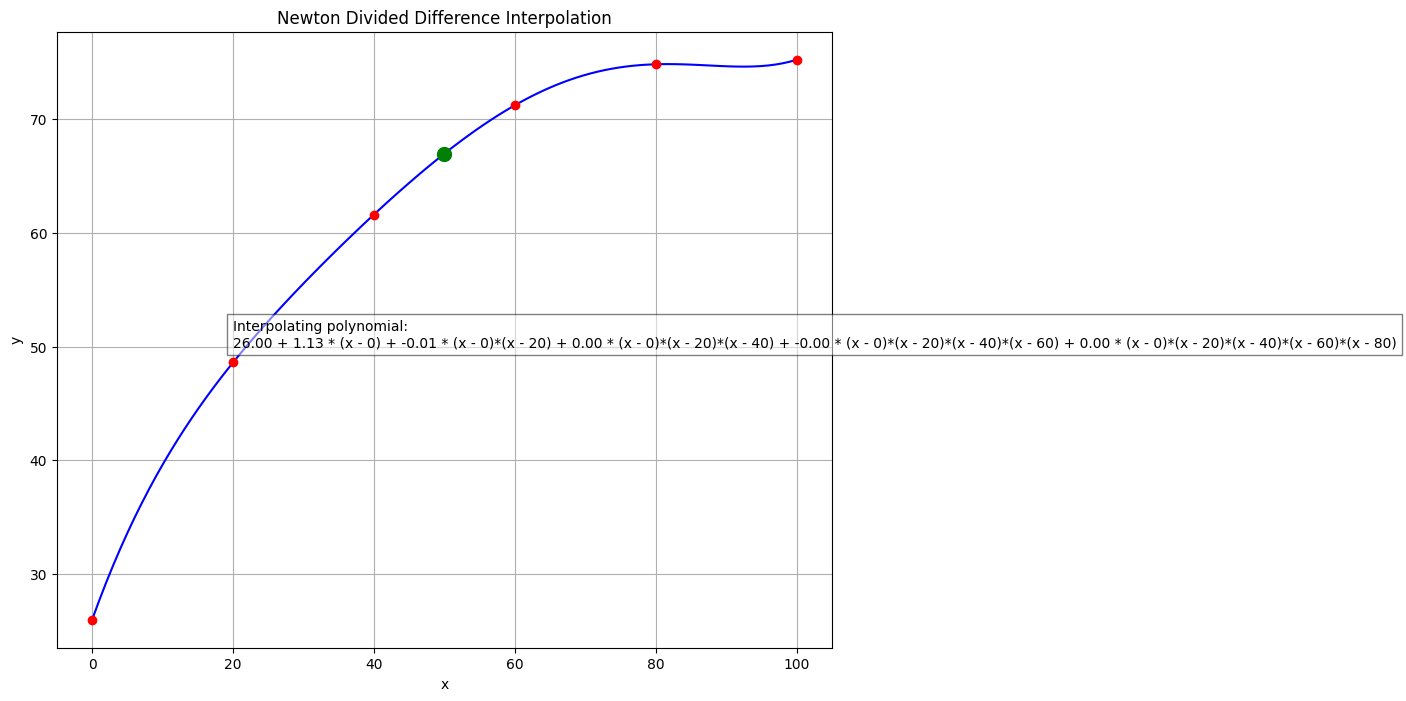

In [30]:
import pandas as pd
import numpy as np

# Read data from CSV file
df = pd.read_csv('interpolation.csv')



point = float(input("Enter x-coordinate to interpolate: "))

def divided_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    return F

def newton_div_dif_poly(x, y, xi):
    F = divided_difference_table(x, y)
    n = len(x)
    N = np.poly1d(F[0][0])
    poly_str = f"{F[0][0]:.2f}"
    for i in range(1, n):
        prod = np.poly1d(x[:i], True)
        N += np.poly1d(F[i][i]*(prod.c))
        poly_str += f" + {F[i][i]:.2f} * {'*'.join(['(x - {})'.format(xi) for xi in x[:i]])}"
    return N, poly_str

# Convert data to numpy arrays
x = df['x'].values
y = df['y'].values

x_new = np.linspace(0, 100, 100)
p, poly_str = newton_div_dif_poly(x, y, 45)

fig = plt.figure(figsize=(10, 8))
plt.plot(x_new, p(x_new), 'b', x, y, 'ro')
plt.plot(point, p(point), 'go', markersize=10)
plt.title('Newton Divided Difference Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.text(20, 50, f'Interpolating polynomial:\n{poly_str}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.show()